In [1]:
from src.preparation import Preprocessor
from src.preparation import Analysis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Let's one more time bring into attention the distribution of the target variable, which will clearly be skewed.

In [2]:
preprocessor = Preprocessor()

train_set = preprocessor.load_data('../data/strat_train_set.csv')
test_set = preprocessor.load_data('../data/strat_test_set.csv')

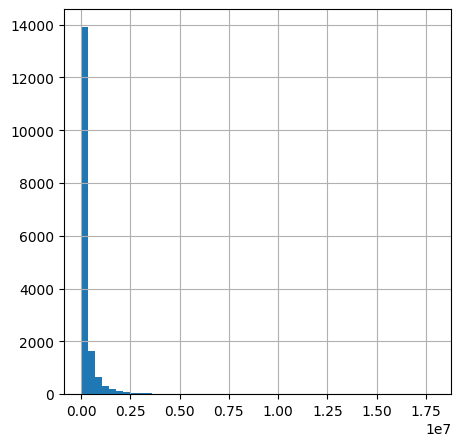

In [3]:
Analysis.build_histogram(train_set, 'price_aprox_usd')

We will transform the target variable, into its logarithm, since its proven that logarithms perform best with skewed distributions. Our goal is to convert this distribution from skewed to a Gaussian Distribution. But in the end, we have to be careful and calculate the exponential of the predictions, since the algorithm will predict the log values, and not the values of the target variable itself.

In [4]:
#Transforming price_aprox_usd to a logarithmic function

train_set['price_aprox_usd'] = Preprocessor.logarithm_target(train_set, 'price_aprox_usd')
test_set['price_aprox_usd'] = Preprocessor.logarithm_target(test_set, 'price_aprox_usd')

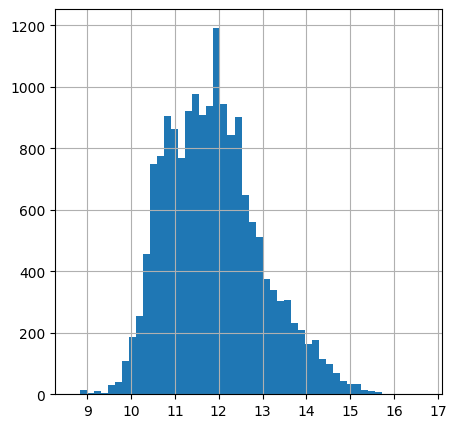

In [5]:
Analysis.build_histogram(train_set, 'price_aprox_usd')

We can see that the price column, is now following a more normal distribution than before. Let's see if this is the case for the test set as well.

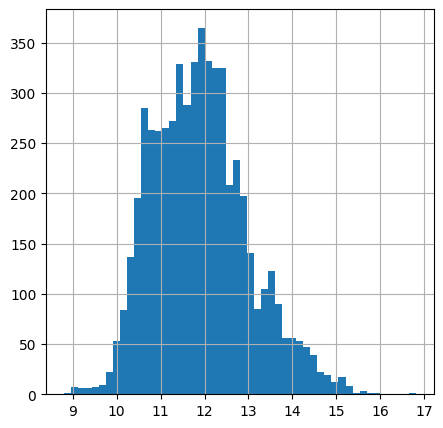

In [6]:
Analysis.build_histogram(test_set, 'price_aprox_usd')

Successfully, also the test target, was updated. Now let's build the pipeline with all possible transformations for our features. We will also create a separate ClussterSimilarity class, which can group similar places in Mexico based on their coordinates.

In [7]:
X_train, X_test, y_train, y_test = train_set.drop(columns='price_aprox_usd'),\
                                   test_set.drop(columns='price_aprox_usd'),\
                                   train_set['price_aprox_usd'],\
                                   test_set['price_aprox_usd']

In [8]:
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

In this notebok, we will also save our updated train test sets as csv files, to reuse them on future modelling sessions. I will also save the preprocessing steps as pickle file, so i can reuse them later among the models, to create a full efficient pipeline for monitoring the work of this mini-system.

In [9]:
#X_train_final, X_test_final = Preprocessor.build_pipeline(X_train, X_test)

# build the pipeline if we want to provide components to truncated svd arbitrarily
pipeline_1 = preprocessor.build_preprocessing_pipeline(use_svd=True)
# build the pipeline if we want to let the GridSearch or RandomSearch to find the optimized hyperparameters
#pipeline_2 = preprocessor.build_preprocessing_pipeline(set_arbitrary_n_components=False)
preprocessor.save_preprocessor(pipeline_1, '../serials/preprocessor_1.pkl')

In [10]:
#preprocessor.save_preprocessor(pipeline_2, '../serials/preprocessor_2.pkl')

In [11]:
# Test
preprocessor_1 = preprocessor.load_preprocessor('../serials/preprocessor_1.pkl')

In [12]:
preprocessor_1 #full pipeline (with arbitrary number of components to PCA set manually)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('surface',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['surface_total_in_m2']),
                                                 ('lat_lon',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cluster_similarity',
                                                                   ClusterSimilarity(random_state=42))]),
                                                  ['lat', 'lon']),
                                                 ('property_borough',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type',
                                                   'borough'])])),
                ('svd', TruncatedSVD(random_state=42))])

In [14]:
#preprocessor_2 = preprocessor.load_preprocessor('../serials/preprocessor_2.pkl')

In [15]:
#preprocessor_2